<a href="https://colab.research.google.com/github/chris0162/Promidat/blob/main/Tarea_2_Preg_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/chris0162/Promidat/main/curso04/tarea2/Pregunta%204.csv"
df = pd.read_csv(url,sep=";")

In [ ]:
df.Score=df.Score.apply(lambda x: x.replace(",", "."))
df.Score=df.Score.astype('float64')

In [ ]:
def Roc(df,umbral):
  # df["Clase_Pred"] = df.
  df["Clase_Pred"] = df.Score.apply(lambda x : "P" if x>umbral else "N")
  TN = len(df[(df.Clase=="N")&(df.Clase_Pred=="N")])
  TP = len(df[(df.Clase=="P")&(df.Clase_Pred=="P")])
  FN = len(df[(df.Clase=="P")&(df.Clase_Pred=="N")])
  FP = len(df[(df.Clase=="N")&(df.Clase_Pred=="P")])
  x = FP/(TN+FP)
  y = TP/(FN+TP)
  print("Probabilidad de Corte: ",umbral)
  print("Matriz de confusión")
  print("            ","Prediccion")
  print("               N","    P")
  print("Real    ", "N"," | ",TN," | ",FP," | ")
  print("        ","P  | ",FN," | ",TP," | ")
  return x,y

In [ ]:
Roc_data=[]
for i in list(range(0,105,5)):
  print("")
  umbral = float(i)/100
  Roc_data.append(Roc(df,umbral))


Probabilidad de Corte:  0.0
Matriz de confusión
             Prediccion
               N     P
Real     N  |  1  |  5  | 
         P  |  0  |  4  | 

Probabilidad de Corte:  0.05
Matriz de confusión
             Prediccion
               N     P
Real     N  |  1  |  5  | 
         P  |  0  |  4  | 

Probabilidad de Corte:  0.1
Matriz de confusión
             Prediccion
               N     P
Real     N  |  2  |  4  | 
         P  |  0  |  4  | 

Probabilidad de Corte:  0.15
Matriz de confusión
             Prediccion
               N     P
Real     N  |  2  |  4  | 
         P  |  1  |  3  | 

Probabilidad de Corte:  0.2
Matriz de confusión
             Prediccion
               N     P
Real     N  |  3  |  3  | 
         P  |  1  |  3  | 

Probabilidad de Corte:  0.25
Matriz de confusión
             Prediccion
               N     P
Real     N  |  3  |  3  | 
         P  |  1  |  3  | 

Probabilidad de Corte:  0.3
Matriz de confusión
             Prediccion
               N     P
R

<Axes: xlabel='Especificidad', ylabel='Sensibilidad'>

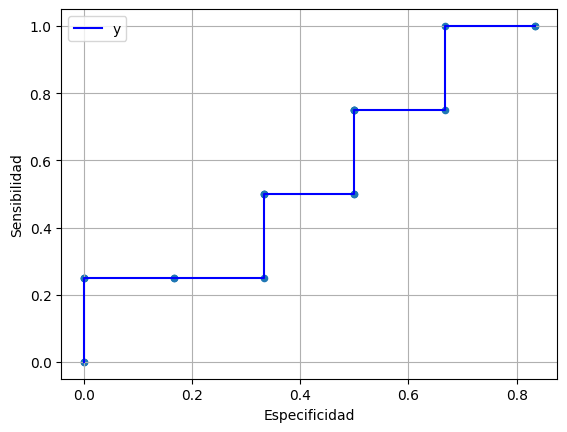

In [ ]:
ax=Roc_curve.plot(x="x",y="y",kind="scatter",style="b")
Roc_curve.plot.line(x="x", y="y", ax=ax, style='b',grid=True, xlabel="Especificidad",ylabel="Sensibilidad")